Tracing the $v_\text{cb}$-anisotropy-related changes in the 21-cm power spectrum to the intermediate correlations.

In [ ]:
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import TwoSlopeNorm, LogNorm, SymLogNorm

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=12)

#import Zeus
import zeus21

#set up the CLASS cosmology
from classy import Class

# Zeus setup

In [2]:
#and the user parameters
UserParams = zeus21.User_Parameters(precisionboost=1.2)

In [3]:
# cosmo inputs from table 2 last column of 1807.06209, as 21cmFAST
ombh2 = 0.02242 
omch2 = 0.11933
tau_re = 0.0544
hLittle = 0.6766
ns = 0.9665
As = np.exp(3.047)*10**(-10.)

In [4]:
#set up your input CLASS parameters here
#note; VCB feedback is turned on as the USE_RELATIVE_VELOCITIES flag in CosmoParams_input

CosmoParams_input = zeus21.Cosmo_Parameters_Input(
    omegac = omch2, omegab = ombh2, h_fid = hLittle, As = As, ns = ns, tau_fid = tau_re, 
    USE_RELATIVE_VELOCITIES = True, Flag_emulate_21cmfast=False
    )
CosmoParams_input_aniso = zeus21.Cosmo_Parameters_Input(
    omegac = omch2, omegab = ombh2, h_fid = hLittle, As = As, ns = ns, tau_fid = tau_re, 
    USE_RELATIVE_VELOCITIES = True, Flag_emulate_21cmfast=False,
    ANISO_XI_ETA = True
    )
ClassyCosmo = zeus21.runclass(CosmoParams_input)
ClassyCosmo_aniso = zeus21.runclass(CosmoParams_input_aniso)
print('CLASS has run, we store the cosmology.')

CLASS has run, we store the cosmology.


In [5]:
#define all cosmology (including derived) parameters, and save them to the CosmoParams structure
CosmoParams = zeus21.Cosmo_Parameters(UserParams, CosmoParams_input, ClassyCosmo) 
CosmoParams_aniso = zeus21.Cosmo_Parameters(UserParams, CosmoParams_input_aniso, ClassyCosmo_aniso)

#Generate and store the matter correlation function
CorrFClass = zeus21.Correlations(UserParams, CosmoParams, ClassyCosmo)
CorrFClass_aniso = zeus21.Correlations(UserParams, CosmoParams_aniso, ClassyCosmo_aniso)
print('Correlation functions saved.')

# Compute the HMF structure that stores associated quantities
HMFintclass = zeus21.HMF_interpolator(UserParams, CosmoParams, ClassyCosmo)
HMFintclass_aniso = zeus21.HMF_interpolator(UserParams, CosmoParams_aniso, ClassyCosmo_aniso)
print('HMF interpolator built. This ends the cosmology part -- moving to astrophysics.')

Correlation functions saved.
HMF interpolator built. This ends the cosmology part -- moving to astrophysics.


In [6]:
### POP II quantities first

################################
### Model Parameters
astromodel = 0            # ASTRO MODEL: 0 for GALUMI-like, 1 for 21cmfast-like, default 0
accretion_model = 0       # ACCRETION MODEL: 0 for exponential, 1 for EPS, default EXP

################################
### SFR(Mh) Parameteres
alphastar = 0.5          # alphastar powerlaw index for low masses, default 0.5
betastar = -0.5           # betastar powerlaw index for high masses, default -0.5
epsstar = 10**-1.             # epsilonstar = fstar at Mc
Mc = 3e11                 # Pivot mass at which the power law cuts for model 0, default Mc = 3e11
dlog10epsstardz = 0.0     # dlog10epsilonstar/dz, default 0

################################
### Escape fraction parameters
fesc10 = 0.1              # fesc(M) parameter. Power law normalized (fesc10) at M=1e10 Msun with index alphaesc
alphaesc = 0.0
L40_xray = 10**0.5        # L40_xray: soft-band (E<2 keV) lum/SFR in Xrays in units of 10^40 erg/s/(Msun/yr)
E0_xray = 500.            # E0_xray: minimum energy in eV
alpha_xray = -1.0         # Xray SED power-law index
Emax_xray_norm=2000       # max energy in eV to normalize SED. Keep at 2000 eV normally

################################
### LyA parameters
Nalpha_lyA_II = 9690      # number of Pop II photons between LyA and Ly Cont. per baryon (from BL05)
Nalpha_lyA_III = 17900    # number of Pop III photons between LyA and Ly Cont. per baryon value of 17900 is from Klessen & Glover 2023 (2303.12500), table A2

################################
### MTURN Parameters: 
Mturn_fixed = None        # Mturn_fixed: None if use Matom(z) at each z, Some value if fixed Mturn
FLAG_MTURN_SHARP= False   # Mturn_sharp: False if regular exponential cutoff, True if sharp cutoff, active only if Mturn_fixed is on

################################
### UVLF Parameters
C0dust = 4.43             # DUST PARAMETERS FOR UVLFs
C1dust = 1.99
sigmaUV = 0.5             # stochasticity (gaussian rms) in the halo-galaxy connection P(MUV | Mh) - TODO: only used in UVLF not sfrd

################################
ZMIN = 10.0               # down to which z we compute the evolution



################################
# Pop III Quantities
alphastar_III = 0 
betastar_III = 0
fstar_III = 10**(-3.0)
Mc_III = 1e7
dlog10epsstardz_III = 0.0

fesc7_III = 10**(-1.35)
alphaesc_III = -0.3
L40_xray_III = 10**0.5
alpha_xray_III = -1.0


USE_POPIII = True
USE_LW_FEEDBACK = True

A_LW = 2.0
beta_LW = 0.6

A_vcb = 1.0
beta_vcb = 1.8


#set up your astro parameters too, here the peak of f*(Mh) as an example

AstroParams = zeus21.Astro_Parameters(UserParams,
                                      CosmoParams, 
                                      astromodel = astromodel, 
                                      accretion_model = accretion_model,
                                      
                                      alphastar = alphastar, 
                                      betastar = betastar, 
                                      epsstar = epsstar, 
                                      Mc = Mc, 
                                      dlog10epsstardz = dlog10epsstardz,
                                      
                                      fesc10 = fesc10, 
                                      alphaesc = alphaesc,
                                      L40_xray = L40_xray, 
                                      E0_xray = E0_xray, 
                                      alpha_xray = alpha_xray, 
                                      Emax_xray_norm = Emax_xray_norm, 
                                      
                                      Nalpha_lyA_II = Nalpha_lyA_II, 
                                      Nalpha_lyA_III = Nalpha_lyA_III,
                                      
                                      Mturn_fixed = Mturn_fixed, 
                                      FLAG_MTURN_SHARP = FLAG_MTURN_SHARP,

                                      C0dust = C0dust, 
                                      C1dust = C1dust,
                                      sigmaUV = sigmaUV,
                                     
                                     
                                      USE_POPIII = USE_POPIII, 
                                      USE_LW_FEEDBACK = USE_LW_FEEDBACK,

                                      alphastar_III = alphastar_III, 
                                      betastar_III = betastar_III,
                                      fstar_III = fstar_III,
                                      Mc_III = Mc_III,
                                      dlog10epsstardz_III = dlog10epsstardz_III,

                                      fesc7_III = fesc7_III,
                                      alphaesc_III = alphaesc_III,
                                      L40_xray_III = L40_xray_III,
                                      alpha_xray_III = alpha_xray_III,
                                               
                                      A_LW = A_LW,
                                      beta_LW = beta_LW,
                                      
                                      A_vcb = A_vcb,
                                      beta_vcb = beta_vcb
                                               )

CoeffStructure = zeus21.get_T21_coefficients(UserParams, CosmoParams, ClassyCosmo, AstroParams, HMFintclass, zmin=ZMIN)
CoeffStructure_aniso = zeus21.get_T21_coefficients(UserParams, CosmoParams_aniso, ClassyCosmo_aniso, AstroParams, HMFintclass_aniso,
                                                    zmin=ZMIN)

print('SFRD and coefficients stored. Move ahead.')

SFRD and coefficients stored. Move ahead.


In [7]:
RSDMODE = 1

PS21 = zeus21.Power_Spectra(UserParams, CosmoParams, AstroParams, ClassyCosmo, CorrFClass, CoeffStructure, RSD_MODE = RSDMODE)
PS21_aniso = zeus21.Power_Spectra(UserParams, CosmoParams_aniso, AstroParams, ClassyCosmo_aniso, CorrFClass_aniso, CoeffStructure_aniso,
                                   RSD_MODE = RSDMODE)

# Correlation functions

In [8]:
klist = CorrFClass._klistCF
klist_aniso = CorrFClass_aniso._klistCF

rlist = CorrFClass.rlist_CF
rlist_aniso = CorrFClass_aniso.rlist_CF

zlist = CoeffStructure.zintegral
zlist_aniso = CoeffStructure_aniso.zintegral

In [9]:
from scipy.interpolate import RegularGridInterpolator

Deltasq_T21_interp = RegularGridInterpolator((zlist, klist), PS21.Deltasq_T21,
                                              method = 'cubic', bounds_error=False, fill_value=0)
Deltasq_T21_interp_aniso = RegularGridInterpolator((zlist_aniso, klist_aniso), PS21_aniso.Deltasq_T21,
                                                  method = 'cubic', bounds_error=False, fill_value=0)

## First, these are the $\Delta_{21}^2$ results

Text(0.5, 0.98, 'Nonlinear $\\Delta^2_{21}(z)$')

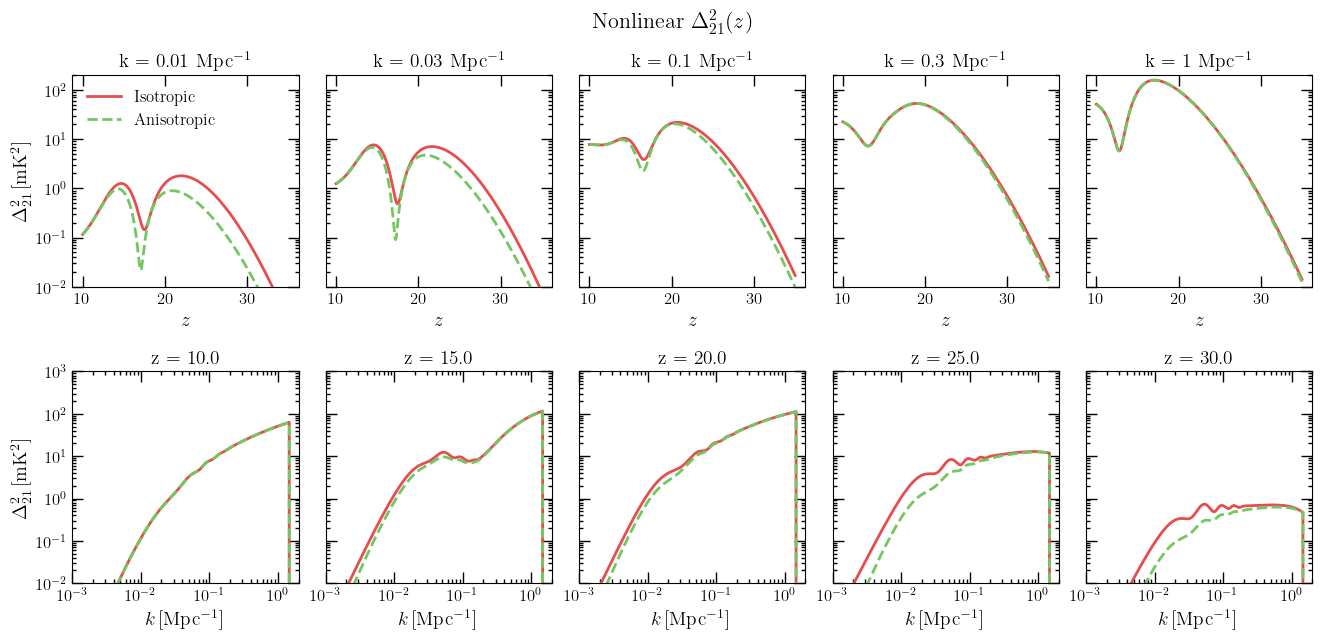

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(16, 6.6), sharey='row')

axes0 = axes[0]
k_values = [0.01, 0.03, 0.1, 0.3, 1]
zlistHighRes = np.geomspace(zlist[0], zlist[-1], 1000)
for i, kchoose in enumerate(k_values):
    powerSpectrum_z = Deltasq_T21_interp((zlistHighRes, kchoose))
    powerSpectrum_z_aniso = Deltasq_T21_interp_aniso((zlistHighRes, kchoose))

    ax = axes0[i]
    ax.semilogy(zlistHighRes, powerSpectrum_z, color="#E64D4E", linewidth=2, label='Isotropic')
    ax.semilogy(zlistHighRes, powerSpectrum_z_aniso, color="#72C75F", linewidth=2, linestyle='--', label='Anisotropic')

    # ax.set_xlim([10, 35])
    ax.set_ylim([0.01, 200])
    ax.set_title(f"k = {kchoose:g} Mpc$^{{-1}}$", fontsize=14)
    ax.tick_params(which='major', length=8, width=1, direction='in', top=True, bottom=True, left=True, right=True)
    ax.tick_params(which='minor', length=3, width=1, direction='in', top=True, bottom=True, left=True, right=True)
    ax.set_xlabel(r'$z$', fontsize=14)
axes0[0].set_ylabel(r'$\Delta^2_{21}\,\rm[mK^2]$', fontsize=14)
axes0[0].legend(fontsize=12, frameon=False, loc='upper left')

axes1 = axes[1]
z_values = [10, 15, 20, 25, 30]
klistHighRes = np.geomspace(1e-4, 1e1, 1000)
for i, zchoose in enumerate(z_values):
    powerSpectrum_k = Deltasq_T21_interp((zchoose, klistHighRes))
    powerSpectrum_k_aniso = Deltasq_T21_interp_aniso((zchoose, klistHighRes))

    ax = axes1[i]
    ax.loglog(klistHighRes, powerSpectrum_k, color="#E64D4E", linewidth=2, label='Isotropic')
    ax.loglog(klistHighRes, powerSpectrum_k_aniso, color="#72C75F", linewidth=2, linestyle='--', label='Anisotropic')

    ax.set_xlim([1e-3, 2])
    ax.set_ylim([1e-2, 1e3])
    ax.set_title(f"z = {zchoose:.1f}", fontsize=14)
    ax.tick_params(which='major', length=8, width=1, direction='in', top=True, bottom=True, left=True, right=True)
    ax.tick_params(which='minor', length=3, width=1, direction='in', top=True, bottom=True, left=True, right=True)
    ax.set_xlabel(r'$k\,\rm [Mpc^{-1}]$', fontsize=14)
axes1[0].set_ylabel(r'$\Delta^2_{21}\,\rm[mK^2]$', fontsize=14)

fig.subplots_adjust(wspace=0.12, hspace=0.4, top=0.88)
fig.suptitle(r'Nonlinear $\Delta^2_{21}(z)$', fontsize=16)

### See their difference

Text(0.5, 0.98, 'Nonlinear $\\Delta^2_{21}(z)$')

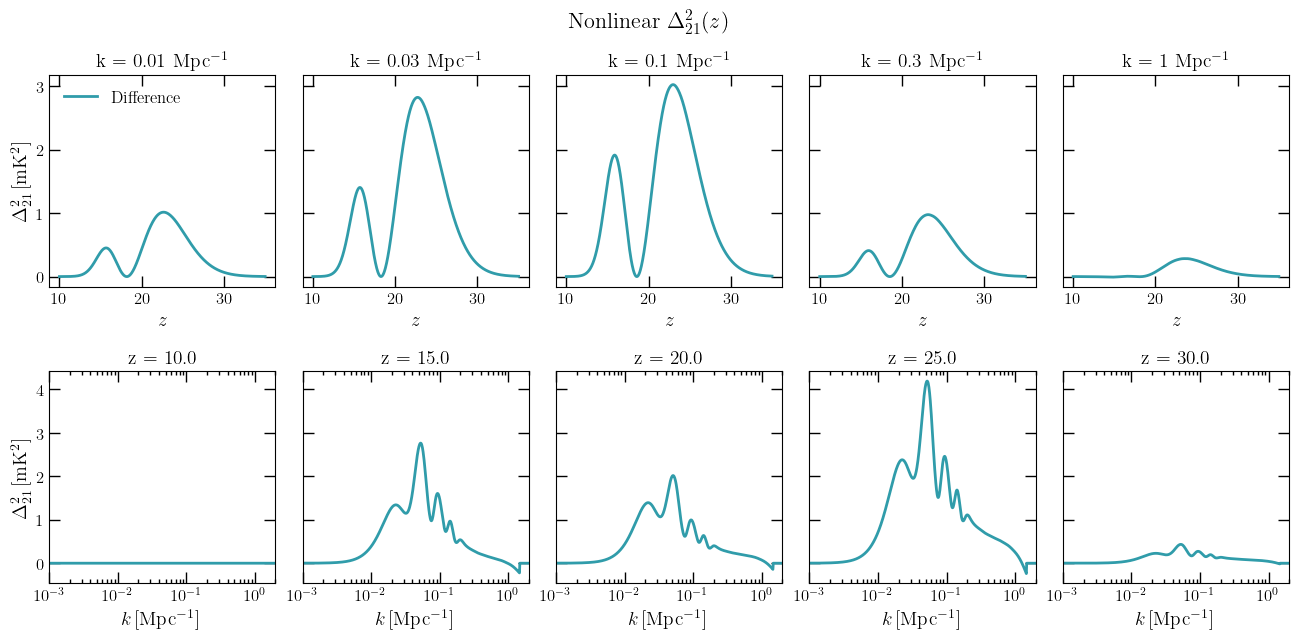

In [20]:
fig, axes = plt.subplots(2, 5, figsize=(16, 6.6), sharey='row')

axes0 = axes[0]
for i, kchoose in enumerate(k_values):
    powerSpectrum_z = Deltasq_T21_interp((zlistHighRes, kchoose))
    powerSpectrum_z_aniso = Deltasq_T21_interp_aniso((zlistHighRes, kchoose))
    powerSpectrum_z_diff = powerSpectrum_z - powerSpectrum_z_aniso

    ax = axes0[i]
    ax.plot(zlistHighRes, powerSpectrum_z_diff, color="#309caa", linewidth=2, label='Difference')
    # ax.set_xlim([10, 35])
    ax.set_title(f"k = {kchoose:g} Mpc$^{{-1}}$", fontsize=14)
    ax.tick_params(which='major', length=8, width=1, direction='in', top=True, bottom=True, left=True, right=True)
    ax.tick_params(which='minor', length=3, width=1, direction='in', top=True, bottom=True, left=True, right=True)
    ax.set_xlabel(r'$z$', fontsize=14)
axes0[0].set_ylabel(r'$\Delta^2_{21}\,\rm[mK^2]$', fontsize=14)
axes0[0].legend(fontsize=12, frameon=False, loc='upper left')

axes1 = axes[1]
for i, zchoose in enumerate(z_values):
    powerSpectrum_k = Deltasq_T21_interp((zchoose, klistHighRes))
    powerSpectrum_k_aniso = Deltasq_T21_interp_aniso((zchoose, klistHighRes))
    powerSpectrum_k_diff = powerSpectrum_k - powerSpectrum_k_aniso

    ax = axes1[i]
    ax.plot(klistHighRes, powerSpectrum_k_diff, color="#309caa", linewidth=2, label='Difference')
    ax.set_xscale('log')
    ax.set_xlim([1e-3, 2])
    ax.set_title(f"z = {zchoose:.1f}", fontsize=14)
    ax.tick_params(which='major', length=8, width=1, direction='in', top=True, bottom=True, left=True, right=True)
    ax.tick_params(which='minor', length=3, width=1, direction='in', top=True, bottom=True, left=True, right=True)
    ax.set_xlabel(r'$k\,\rm [Mpc^{-1}]$', fontsize=14)
axes1[0].set_ylabel(r'$\Delta^2_{21}\,\rm[mK^2]$', fontsize=14)

fig.subplots_adjust(wspace=0.12, hspace=0.4, top=0.88)
fig.suptitle(r'Nonlinear $\Delta^2_{21}(z)$', fontsize=16)

## How did these differences come to be?

### $\xi_\mathcal{V}(r)$ is the most upstream (and basically only) function we modified

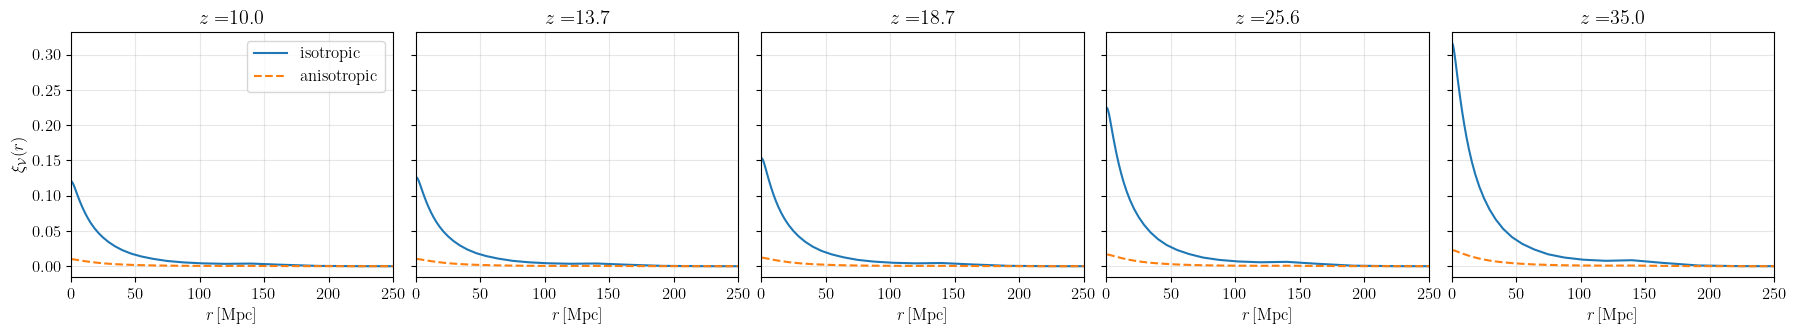

In [12]:
xi_V = PS21._etaCorr_xa
xi_V_aniso = PS21_aniso._etaCorr_xa

R1_choose = 0
R2_choose = 0

xi_V_R1R2 = xi_V[:, R1_choose, R2_choose, :]
xi_V_aniso_R1R2 = xi_V_aniso[:, R1_choose, R2_choose, :]

Nz = xi_V_R1R2.shape[0]
idxs = np.unique(np.linspace(0, Nz - 1, 5, dtype=int))

fig, axes = plt.subplots(1, len(idxs), figsize=(18, 3.5), sharey=True)
for ax, i in zip(axes, idxs):
    ax.plot(rlist, xi_V_R1R2[i, :], label='isotropic')
    ax.plot(rlist_aniso, xi_V_aniso_R1R2[i, :], '--', label='anisotropic')
    ax.set_xlim(0, 250)
    ax.set_title(r"$z=${%.1f}" % (zlist[i]))
    ax.set_xlabel(r"$r\,[\mathrm{Mpc}]$")
    ax.grid(True, alpha=0.3)

axes[0].set_ylabel(r'$\xi_\mathcal{V}(r)$')
axes[0].legend()
plt.tight_layout()

These differences look nothing like the differences in $\Delta_{21}^2$ that we're hoping to see! But in fact there's no reason to assume that they should look similar, because $\xi_\mathcal{V}(r)$ is only a small building block of the many correlations that contribute to $\Delta_{21}^2$, which add up in nonlinear ways and with different weights. Therefore, just looking at $\xi_\mathcal{V}(r)$ is not very illuminating.

All of the immediately downstream correlations exhibit the same behavior (`_III_deltaxi_xa`, `_III_deltaxi_Tx`, `_III_deltaxi_xaTx`).

To see the behavior of more composite correlation functions that do contribute linearly to $\Delta_{21}^2$, we plot instead the correlations that come right before the final step, i.e., correlations that directly couple to the weighting coefficients $\beta$. We plot the $\beta$'s as well.

### $\xi_\alpha(r)$ (`Deltasq_xa`), $\xi_{\alpha X}(r)$ (`Deltasq_xaTx`), $\xi_X(r)$ (`Deltasq_Tx`), and their coefficients

In [57]:
beta_Deltasq_xa = PS21._betaxa
Deltasq_xa = PS21.Deltasq_xa
Deltasq_xa_aniso = PS21_aniso.Deltasq_xa
Deltasq_xa_diff = Deltasq_xa - Deltasq_xa_aniso

Deltasq_xaTx = PS21.Deltasq_xaTx
Deltasq_xaTx_aniso = PS21_aniso.Deltasq_xaTx
Deltasq_xaTx_diff = Deltasq_xaTx - Deltasq_xaTx_aniso

beta_Deltasq_Tx = PS21._betaT
Deltasq_Tx = PS21.Deltasq_Tx
Deltasq_Tx_aniso = PS21_aniso.Deltasq_Tx
Deltasq_Tx_diff = Deltasq_Tx - Deltasq_Tx_aniso

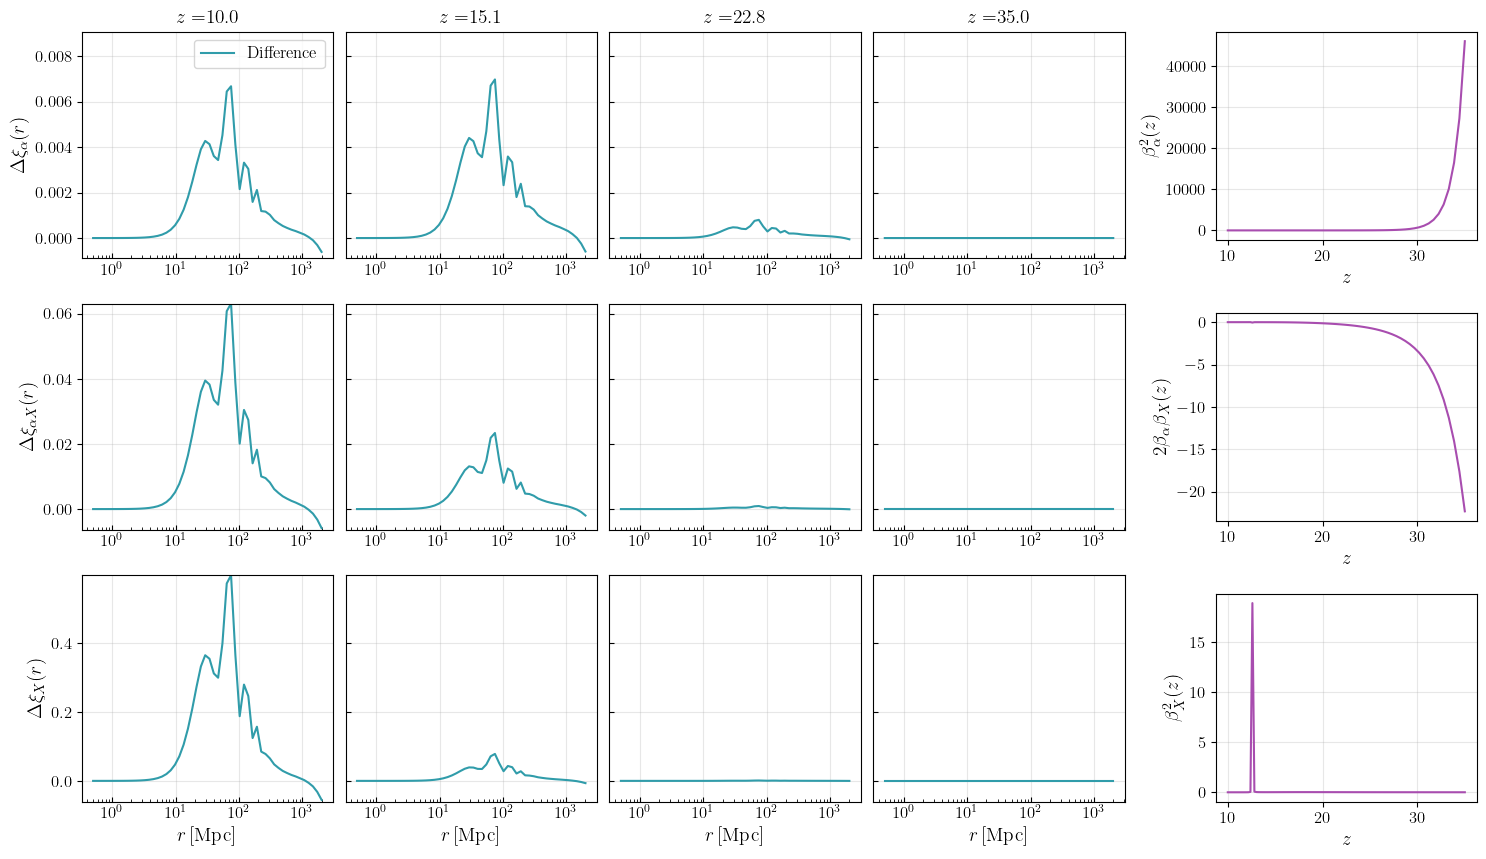

In [58]:
Nz = zlist.shape[0]
idxs = np.unique(np.linspace(0, Nz - 1, 4, dtype=int))

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(nrows=3, ncols=3, width_ratios=[len(idxs), 0.35, 1.0], wspace=0.0, hspace=0.35)

gs_left = gs[:, 0].subgridspec(3, len(idxs), wspace=0.05)
axes_corr = np.empty((3, len(idxs)), dtype=object)
for r in range(3):
    for c in range(len(idxs)):
        sharex_ax = axes_corr[0, c] if r > 0 else None
        sharey_ax = axes_corr[r, 0] if c > 0 else None
        axes_corr[r, c] = fig.add_subplot(gs_left[r, c], sharex=sharex_ax, sharey=sharey_ax)

axes_beta = [fig.add_subplot(gs[r, 2]) for r in range(3)]

for ax, i in zip(axes_corr[0], idxs):
    ax.plot(rlist, Deltasq_xa_diff[i, :], color="#309caa", label='Difference')
    ax.set_xscale('log')
    ax.set_ylim(Deltasq_xa_diff.min()*1.1, Deltasq_xa_diff.max())
    ax.set_title(r"$z=${%.1f}" % (zlist[i]), fontsize=14)
    ax.tick_params(axis='x', which='both', direction='in')
    ax.grid(True, alpha=0.3)
axes_corr[0][0].set_ylabel(r'$\Delta\xi_\alpha(r)$', fontsize=14)
axes_corr[0][0].legend()

for ax, i in zip(axes_corr[1], idxs):
    ax.plot(rlist, Deltasq_xaTx_diff[i, :], color="#309caa", label='Difference')
    ax.set_xscale('log')
    ax.set_ylim(Deltasq_xaTx_diff.min()*1.1, Deltasq_xaTx_diff.max())
    ax.tick_params(axis='x', which='both', direction='in')
    ax.grid(True, alpha=0.3)
axes_corr[1][0].set_ylabel(r'$\Delta\xi_{\alpha X}(r)$', fontsize=14)

for ax, i in zip(axes_corr[2], idxs):
    ax.plot(rlist, Deltasq_Tx_diff[i, :], color="#309caa", label='Difference')
    ax.set_xscale('log')
    ax.set_ylim(Deltasq_Tx_diff.min()*1.1, Deltasq_Tx_diff.max())
    ax.set_xlabel(r"$r\,[\mathrm{Mpc}]$", fontsize=14)
    ax.tick_params(axis='x', which='both', direction='in')
    ax.grid(True, alpha=0.3)
axes_corr[2][0].set_ylabel(r'$\Delta\xi_X(r)$', fontsize=14)

for row_axes in axes_corr:
    for ax in row_axes[1:]:
        ax.tick_params(axis='y', which='both', labelleft=False, direction='in')

for ax, beta in zip(axes_beta, [beta_Deltasq_xa**2, 2*beta_Deltasq_xa*beta_Deltasq_Tx, beta_Deltasq_Tx**2]):
    ax.plot(zlist, beta, color="#a84daf")
    ax.grid(True, alpha=0.3)
    ax.set_xlabel(r'$z$', fontsize=14)
axes_beta[0].set_ylabel(r'$\beta_\alpha^2(z)$', fontsize=14)
axes_beta[1].set_ylabel(r'$2\beta_{\alpha}\beta_X(z)$', fontsize=14)
axes_beta[2].set_ylabel(r'$\beta_X^2(z)$', fontsize=14)

plt.tight_layout()

Now we're seeing the expected pattern from the $\Delta_{21}^2$ plot! I'm not sure why the $\beta$ coefficients look the way they do, especially the third one.

Plot these in 2 dimensions with interpolation, because why not:

In [59]:
Deltasq_xa_diff_interp = RegularGridInterpolator((zlist, rlist), Deltasq_xa_diff,
                                              method = 'cubic', bounds_error=False, fill_value=0)
Deltasq_xaTx_diff_interp = RegularGridInterpolator((zlist, rlist), Deltasq_xaTx_diff,
                                              method = 'cubic', bounds_error=False, fill_value=0)
Deltasq_Tx_diff_interp = RegularGridInterpolator((zlist, rlist), Deltasq_Tx_diff,
                                              method = 'cubic', bounds_error=False, fill_value=0)

rlistHighRes = np.geomspace(rlist[0], rlist[-1], 1000)
zmesh, rmesh = np.meshgrid(zlistHighRes, rlistHighRes, indexing='ij')
Deltasq_xa_diff_interped = Deltasq_xa_diff_interp(np.column_stack([zmesh.ravel(), rmesh.ravel()])).reshape(zmesh.shape)
Deltasq_xaTx_diff_interped = Deltasq_xaTx_diff_interp(np.column_stack([zmesh.ravel(), rmesh.ravel()])).reshape(zmesh.shape)
Deltasq_Tx_diff_interped = Deltasq_Tx_diff_interp(np.column_stack([zmesh.ravel(), rmesh.ravel()])).reshape(zmesh.shape)

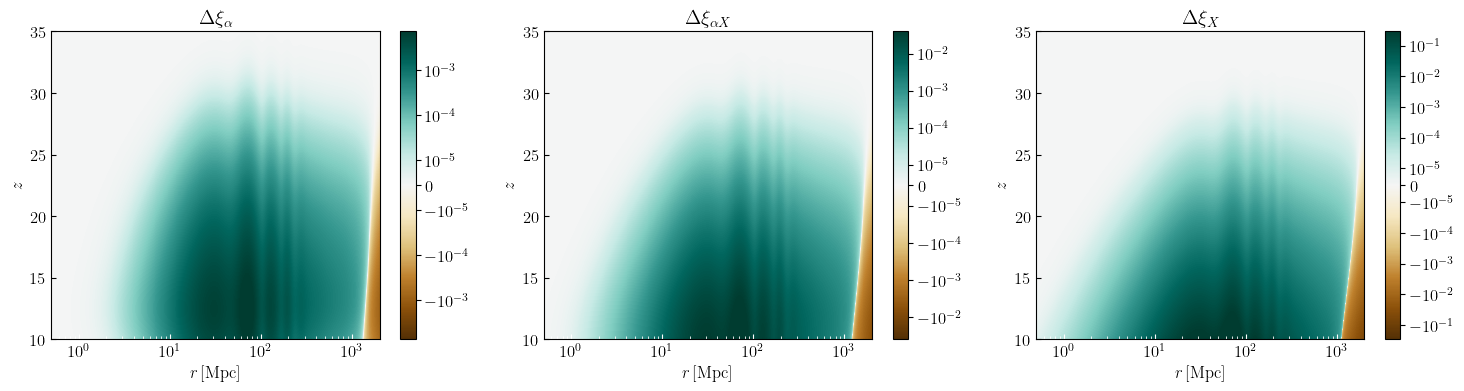

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for ax, data, label in zip(axes, 
                         [Deltasq_xa_diff_interped, Deltasq_xaTx_diff_interped, Deltasq_Tx_diff_interped],
                         [r'$\Delta\xi_\alpha$', r'$\Delta\xi_{\alpha X}$', r'$\Delta\xi_X$']):
    v = np.nanpercentile(np.abs(data), 99)
    pcm = ax.pcolormesh(rlistHighRes, zlistHighRes, data, cmap='BrBG', 
                        norm=SymLogNorm(linthresh=1e-5, linscale=0.5, vmin=-v, vmax=v, base=10), 
                        shading='auto')
    ax.set_xscale('log')
    ax.set_xlabel(r'$r\,[\mathrm{Mpc}]$')
    ax.set_ylabel(r'$z$')
    ax.tick_params(axis='x', which='both', direction='in', color='w')
    ax.tick_params(axis='y', direction='in')
    ax.set_title(label)
    fig.colorbar(pcm, ax=ax)

Green means isotropic > anisotropic, and yellow means anisotropic > isotropic.

The general behaviors are similar, but note the different scales on the colorbars.

# Weighted sum of the differences in the relevant correlations (the three above)

Now we calculate the net difference, adding up (with weights) the three correlations like Eq. (91):

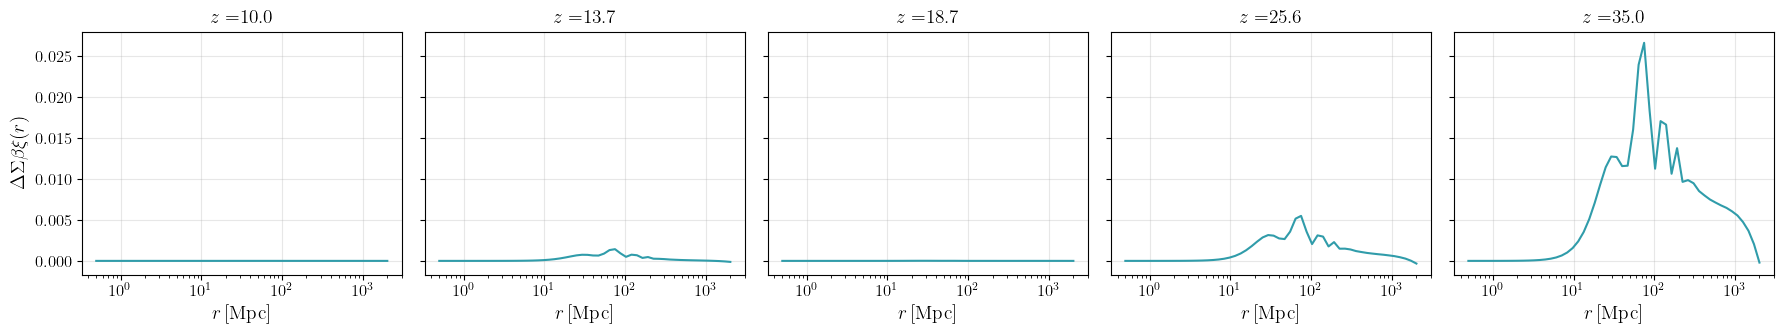

In [64]:
corrs_sum_diff = beta_Deltasq_xa[:, np.newaxis]**2 * Deltasq_xa_diff \
                    + beta_Deltasq_Tx[:, np.newaxis]**2 * Deltasq_Tx_diff \
                    + 2.0 * beta_Deltasq_xa[:, np.newaxis] * beta_Deltasq_Tx[:, np.newaxis] * Deltasq_xaTx_diff

Nz = zlist.shape[0]
idxs = np.unique(np.linspace(0, Nz - 1, 5, dtype=int))

fig, axes = plt.subplots(1, len(idxs), figsize=(18, 3.5), sharey=True)
for ax, i in zip(axes, idxs):
    ax.plot(rlist, corrs_sum_diff[i, :],c='#309caa')
    ax.set_xscale('log')
    # ax.set_xlim(0, 250)
    ax.set_title(r"$z=${%.1f}" % (zlist[i]), fontsize=14)
    ax.set_xlabel(r"$r\,[\mathrm{Mpc}]$", fontsize=14)
    ax.grid(True, alpha=0.3)

axes[0].set_ylabel(r'$\Delta\Sigma\beta\xi(r)$', fontsize=14)
plt.tight_layout()

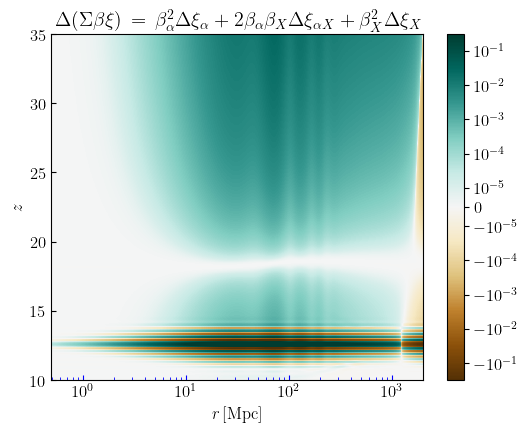

In [65]:
corrs_sum_diff_interp = RegularGridInterpolator((zlist, rlist), corrs_sum_diff,
                                              method = 'cubic', bounds_error=False, fill_value=0)
corrs_sum_diff_interped = corrs_sum_diff_interp(np.column_stack([zmesh.ravel(), rmesh.ravel()])).reshape(zmesh.shape)

fig, ax = plt.subplots(1, 1, figsize=(6, 4.5))
v = np.nanpercentile(np.abs(corrs_sum_diff_interped), 99)
pcm = ax.pcolormesh(rlistHighRes, zlistHighRes, corrs_sum_diff_interped, cmap='BrBG',
                    norm=SymLogNorm(linthresh=1e-5, linscale=0.5, vmin=-v, vmax=v, base=10),
                    shading='auto')
ax.set_xscale('log')
ax.set_xlabel(r'$r\,[\mathrm{Mpc}]$')
ax.set_ylabel(r'$z$')
ax.tick_params(axis='x', which='both', direction='in', color='b')
ax.tick_params(axis='y', direction='in')
ax.set_title(r'$\Delta(\Sigma\beta\xi)\,=\,\beta_\alpha^2\Delta\xi_\alpha+2\beta_\alpha\beta_X\Delta\xi_{\alpha X}+\beta_X^2\Delta\xi_X$')
fig.colorbar(pcm, ax=ax)

The violent oscillations at $z\approx12.5$ are due to the strange delta-function-like $\beta_X$.

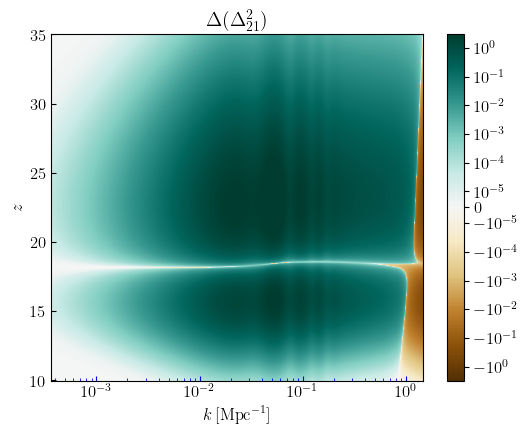

In [66]:
Deltasq_T21_diff = PS21.Deltasq_T21 - PS21_aniso.Deltasq_T21
Deltasq_T21_diff_interp = RegularGridInterpolator((zlist, klist), Deltasq_T21_diff,
                                              method = 'cubic', bounds_error=False, fill_value=0)

zmesh, kmesh = np.meshgrid(zlistHighRes, klistHighRes, indexing='ij')
Deltasq_T21_diff_interped = Deltasq_T21_diff_interp(np.column_stack([zmesh.ravel(), kmesh.ravel()])).reshape(zmesh.shape)

fig, ax = plt.subplots(1, 1, figsize=(6, 4.5))
v = np.nanpercentile(np.abs(Deltasq_T21_diff_interped), 99)
pcm = ax.pcolormesh(klistHighRes, zlistHighRes, Deltasq_T21_diff_interped, cmap='BrBG',
                    norm=SymLogNorm(linthresh=1e-5, linscale=0.5, vmin=-v, vmax=v, base=10),
                    shading='auto')
ax.set_xscale('log')
ax.set_xlabel(r'$k\,[\mathrm{Mpc}^{-1}]$')
ax.set_ylabel(r'$z$')
ax.set_xlim([klist[0], klist[-1]])
ax.tick_params(axis='x', which='both', direction='in', color='b')
ax.tick_params(axis='y', direction='in')
ax.set_title(r'$\Delta(\Delta^2_{21})$')
fig.colorbar(pcm, ax=ax)

Somehow there are no violent oscillations at $z\approx12.5$. Not sure why yet.